In [2]:
import pandas as pd
marathon_2015_2017 = pd.read_csv("marathon_2015_2017.csv")
pd.options.display.max_columns = 25
marathon_2015_2017.head(2)

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883,1783,2697,3629,3842,4567,5520,6479,7359,296,7757,1,1,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883,1783,2698,3628,3841,4567,5519,6479,7362,298,7788,2,2,2,2015


In [3]:
# 현지인들만 골라낸 데이터 필터링
USA_runner = marathon_2015_2017[marathon_2015_2017['Country']=='USA']
USA_runner.head(2)

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
6,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,885,1785,2720,3643,3843,4565,5519,6486,7445,301,7880,7,7,7,2015
7,"Keflezighi, Meb",39,M,San Diego,CA,USA,884,1784,2699,3630,3842,4567,5519,6479,7498,304,7962,8,8,8,2015


In [4]:
USA_runner.shape

(64474, 21)

#### 막대차트(Bar Chart)
* 파이썬 외부 라이브러리 중 차트를 지원하는 모듈 : matplotlib.pyplot
* 파이썬 차트에 얹혀서 사용되는 업그레이드 차트 모듈 : seaborn

C:\Users\JAVA01\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


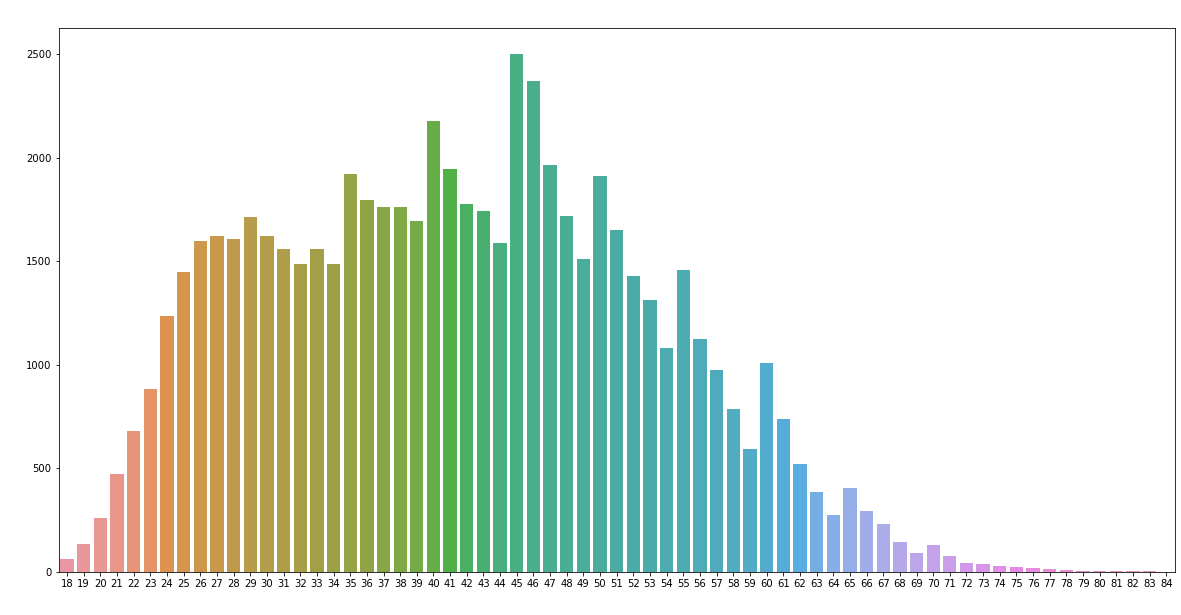

In [9]:
# 미국 참가자의 연령별 참석 인원 수
import matplotlib.pyplot as plt
import seaborn as sns
# 차트의 크기를 설정합니다 - 화면에 위치하는 차트의 크기를 표시하지만
# 크기보다는 비율로 사용되는 경우가 많습니다
plt.figure(figsize=(20, 10))
# countplot : seaborn의 BarChart를 생성하는 함수이며, 주로 대상 데이터의 개수를
# 대상으로 차트를 그립니다
# 차트 대상 데이터 : USA_runner
# count대상 컬럼 : 'Age'
runner_Age = sns.countplot('Age', data = USA_runner)
# runner_Age : 차트의 컨트롤 변수

# 차트의 제목 설정
runner_Age.set_title("Number of Runner by Age", fontdict={'size':20, 'color':'white'})
# x축의 축 제목 설정
runner_Age.set_xlabel("Age", fontdict={'size':16, 'color':'white'})
# y축의 축 제목 설정
runner_Age.set_ylabel("Number of Runner", fontdict={'size':16, 'color':'white'})

plt.show()

* USA_runner 데이터에 Age_20컬럼을 추가하고,
* 15세는 10(대), 23세는 20(대), 38세는 30(대) ... 로 입력한 후 ('대'는 생략)
* 연령대별 참석자 인원을 차트로 표현하세요
* 차트제목, 축 제목은 위의 차트와 동일하게 합니다

<ipython-input-11-cbc3522516db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_runner['Age_10'] = USA_runner['Age']//10 * 10


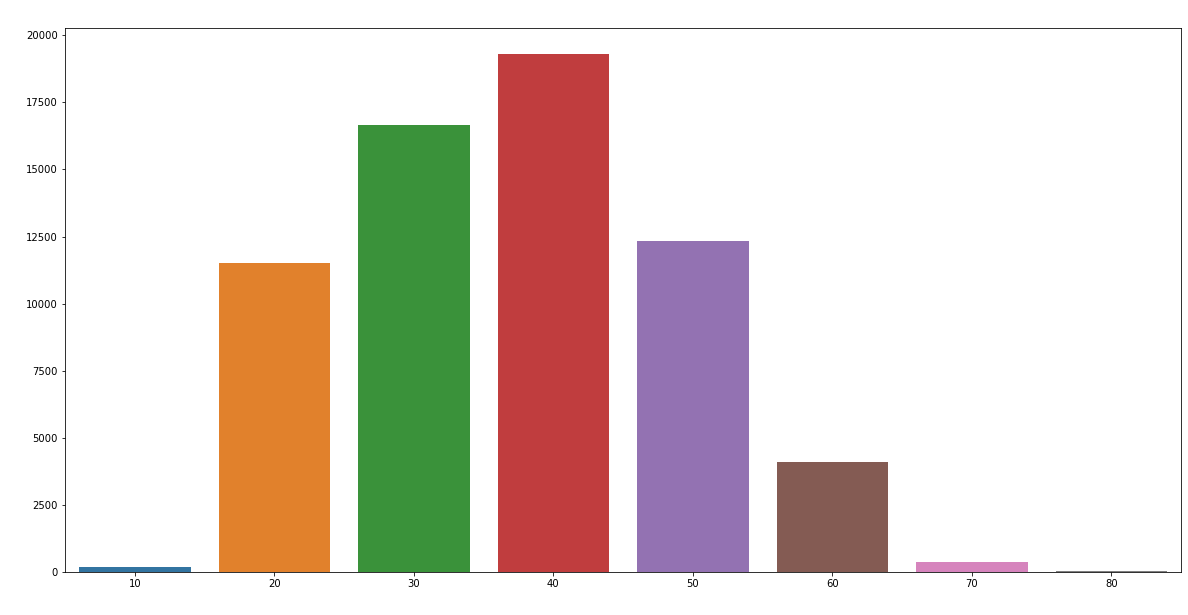

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
USA_runner['Age_10'] = USA_runner['Age']//10 * 10  # // : 소수점이 발생하지 않는 나눗셈
plt.figure(figsize=(20, 10))
runner_Age = sns.countplot(x='Age_10', data = USA_runner)

# 차트의 제목 설정
runner_Age.set_title("Number of Runner by Age", fontdict={'size':20, 'color':'white'})
# x축의 축 제목 설정
runner_Age.set_xlabel("Age", fontdict={'size':16, 'color':'white'})
# y축의 축 제목 설정
runner_Age.set_ylabel("Number of Runner", fontdict={'size':16, 'color':'white'})
plt.show()

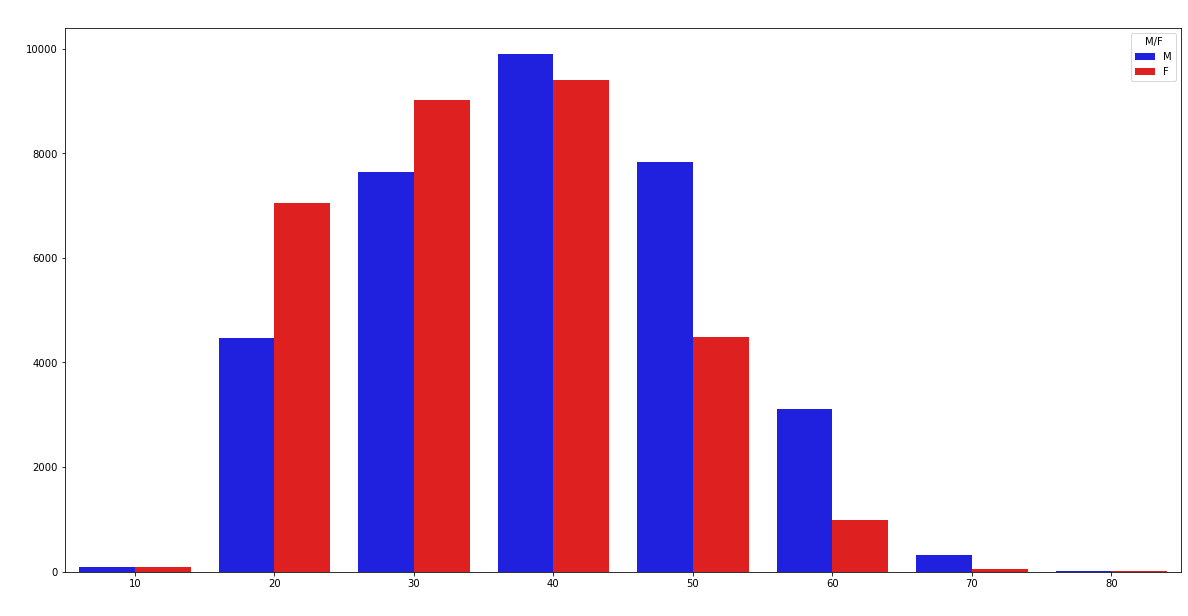

In [25]:
# 각 연령대별, 남녀 인원 수
plt.figure(figsize=(20, 10))
runner_state = sns.countplot(x='Age_10', data = USA_runner, hue='M/F', palette={'F':'r','M':'b'})
runner_state.set_title("Number of Runner by Age_10, Gender - USA", fontdict={'size':20, 'color':'white'})
runner_state.set_xlabel("Age_10", fontdict={'size':16, 'color':'white'})
runner_state.set_ylabel("Number of Runner", fontdict={'size':16, 'color':'white'})
plt.show()

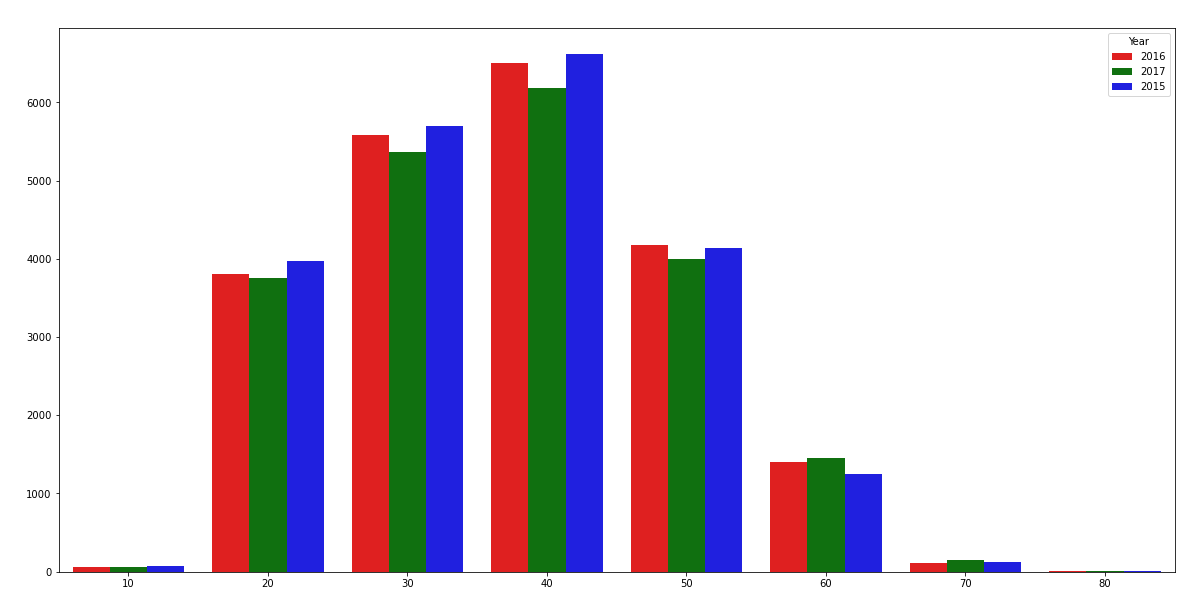

In [50]:
# 연도별 - 연령대별 참가자 인원 수 차트 표시
plt.figure(figsize=(20, 10))
runner_state = sns.countplot(x='Age_10', data = USA_runner, hue='Year', palette={2015:'b',2016:'r',2017:'g'}, \
                            hue_order={2016,2015,2017})
# hue_order : 값들의 순서 변경
runner_state.set_title("Number of Runner by Age_10, Gender - USA", fontdict={'size':20, 'color':'white'})
runner_state.set_xlabel("Age_10", fontdict={'size':16, 'color':'white'})
runner_state.set_ylabel("Number of Runner", fontdict={'size':16, 'color':'white'})
plt.show()

<BarContainer object of 8 artists>

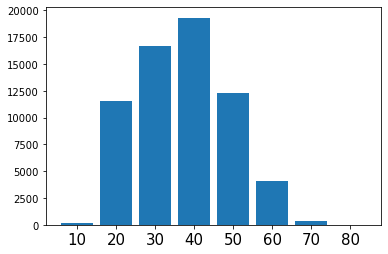

In [47]:
import numpy as np
tg = USA_runner.groupby('Age_10')['Name'].count()
label = ['10','20','30','40','50','60','70','80']
index = np.arange(len(label))
plt.xticks(index, label, fontsize=15)
plt.bar(index, tg)